<h1>Neural Network From Scratch with NumPy</h1>
<hr />

<h2>1. What is a Neural Network</h2>

<p>Let's first review what a neural network actually is. A neural network is a collection of connected nodes, with each of these nodes - or neurons - receiving an input and returning an output to the next nodes.</p>
<p>A neural network has at least 3 layers, the input layer, which contains the data to be processed; the hidden layer, which performs the main processing; and the output layer, which is the one that actually returns the output we want. Of course, we could have as many hidden layers as we want. Usually, we do not count the input layer when measuring the side of a neural network, so a neural network with one input layer, one hidden layer, and one output layer is classified as a 2 layer neural network.</p>
<p>Let's start by a very simple type of neural network, a feedforward multilayer perceptron. Feedforward means there are no cicles or loops in the network, and multilayer perceptron means each of the network's nodes is a perceptron.</p>
<p>A more graphical representation below, more on it later.</p>

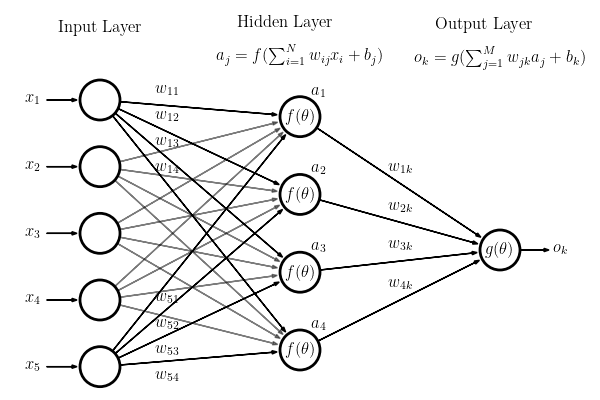
<br />
<i><a href="https://www.astroml.org/book_figures/chapter9/fig_neural_network.html">Image Source: astroML</a></i>

<h2>2. The Perceptron</h2>

<p>Let's start by breaking this down, and defining a perceptron, or each node of the hidden layer.</p>

<p>A Perceptron is a binary classifier, that is, it receives input data, performs some computations, and finally returns a 1 or a 0.</p>

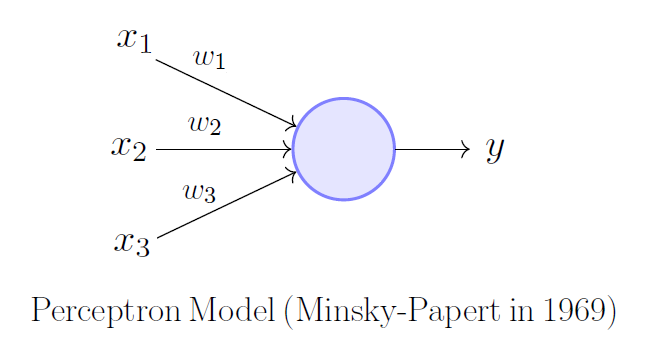

<p>So we're basically taking an input vector, $x$, element-wise multiplying it by a weight vector $w$, then we sum all of these values. We'll also sum a bias $b$ to this result, and the result of these operations is what we'll cal $y$. Notice this element-wise multiplying two vectors and then summing the result is the same as computing the dot product of the vectors.</p> 
<p>To summarize this process in an equation:</p>
<p>$$y = w^T \cdot x + b$$</p>
<p>Or, more explicitly:</p>
<p>$$y = \sum_{n=1} w_{i}x_{i} + b$$</p>
<p>where $w$ and $x$ are vectors of the same length and $b$ is a real number.</p>

<p>Now, let's map this y, which has any real number as it's codomain, into $[0, 1]$. To accomplish this, we'll use a function $\sigma$ whose domain is a real number, and codomain is $[0, 1]$, that is, $\sigma:\mathbb{R} \mapsto [0, 1]$.</p>
<p>We'll call this $\sigma$ function the activation function, more on activation functions later.</p>
<p>So, the output of the perceptron, $\hat{y}$, can be described as:</p>
<p>$$\hat{y} = \sigma(w^T \cdot x + b)$$</p>
<p>or</p>
<p>$$\hat{y} = \sigma(\sum_{n=1} w_{i}x_{i} + b)$$</p>
<p>Where $\sigma$ is the activation function $\sigma:\mathbb{R} \mapsto [0, 1]$, $w$ and $x$ are vectors of same length which represent respectively the weights and the inputs, and $b$ is a real number, the bias.</p>
<p>Finally, we must set a <b>treshold</b>, that is, a number that lets us map the output into actually two classes, a 1 or a 0. For now, let's just use 0.5. So, 
<p>if $ \sigma(w^T \cdot x + b) \leq 0.5$, then $\hat{y} = 0$</p> 
<p>If $ \sigma(w^T \cdot x + b) > 0.5$, then $\hat{y} = 1$</p>
<p>or, </p>
$$\begin{equation*}
\hat{y}=\begin{cases}
          0 \quad &\text{if} \, \sigma(w^T \cdot x + b) \leq 0.5 \\
          1 \quad &\text{if} \, \sigma(w^T \cdot x + b) > 0.5 \\
     \end{cases}
\end{equation*}$$
<p>Now let's define a perceptron in python:</p>

In [1]:
# canonical importing
import numpy as np

We'll use the following as our activation function, more on activation functions later.

In [2]:
# defining sigmoid activation function
def sigmoid(x):
    return 1 / (1 + (np.exp(-x)))

In [3]:
def perceptron(x, w, b=0, sigma=sigmoid):
    '''
    this function receives x and w, numpy vectors of same length and optionally b, a real number,
    and sigma, an activation function
    
    it returns a float which represents the probability that the vector is of a certain class, 1 
    '''
    return sigma(np.dot(w, x) + b)

In [5]:
my_x = np.array([1, 3, 2])
my_w = np.array([-0.5, 0.01, 0.8])
my_b = 1

y_hat = perceptron(my_x, my_w, my_b)
print('Before making it binary: {}'.format(y_hat))

if y_hat <= 0.5:
    y_hat = 0
else:
    y_hat = 1
    
print('After: {}'.format(y_hat))

Before making it binary: 0.8937850083248244
After: 1
